**ESTADISTICA APLICADA** - Grupo 51

*SEGUNDO PARCIAL*

Alumna: Erika Denisse Cardona Padilla

Matricula: 1888872

In [51]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = [10, 7.5]

In [5]:
proceso = pd.read_csv('https://raw.githubusercontent.com/DenisseCardona/Tareas_EstadisticaAplicada_24/main/proceso_desconocido.csv?token=GHSAT0AAAAAABSHL5VMXEHRRKJUUAN66SXCYSBGCVQ',index_col='tiempo',parse_dates=True)

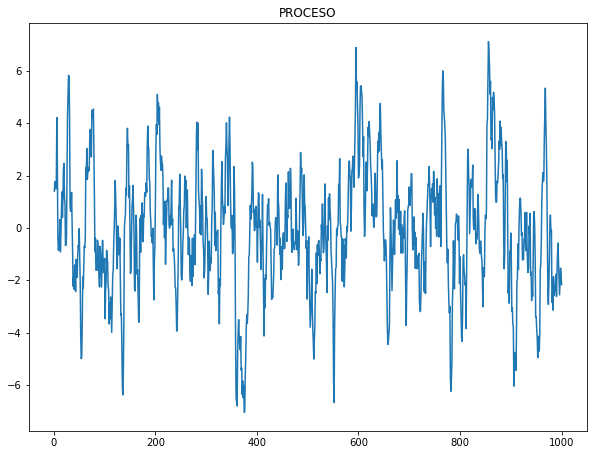

In [39]:
#graficamos
plt.plot(proceso)
plt.title(r'PROCESO')
plt.show()

In [40]:
#Prueba de dickey fuller aumentada ADF
adf = adfuller(proceso)

#presentamos el p-value
print('p-value: %.2f' % adf[1])

p-value: 0.00


NOTA: H0 : serie no estacionaria

In [41]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


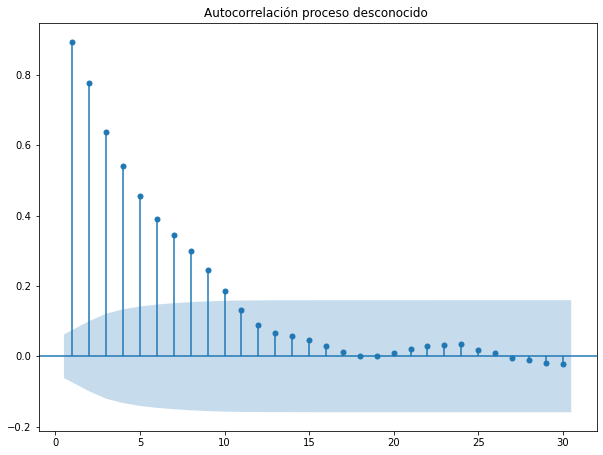

In [42]:
#graficamos función de autocorrelación
plot_acf(proceso, zero=False, lags=30)
plt.title(r'Autocorrelación proceso desconocido ')
plt.show()

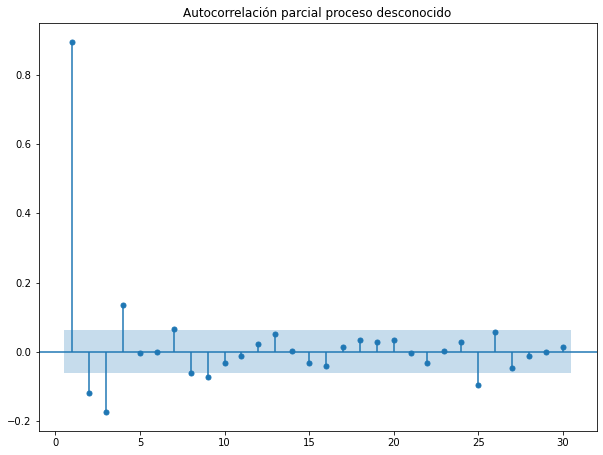

In [43]:
plot_pacf(proceso, zero=False, lags=30)
plt.title(r'Autocorrelación parcial proceso desconocido')
plt.show() 

Es un proceso AR ya que en su grafica de autocorrelacion podemos notar que los valores decrementan en la trayectoria del proceso de manera mas regular.
Tambien de acuerdo con su grafica de autocorrelacion parcial podemos ver que los datos tienen la forma de un proceso AR.

In [44]:
# estimamos un ARMA (1,1)
modelo = ARIMA(proceso, order=(1, 0, 1))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                     ARMA(1, 1)   Log Likelihood               -1461.472
Method:                       css-mle   S.D. of innovations              1.043
Date:                Sun, 27 Mar 2022   AIC                           2930.944
Time:                        22:45:12   BIC                           2950.575
Sample:                             0   HQIC                          2938.405
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0963      0.292     -0.330      0.741      -0.668       0.476
ar.L1.proceso     0.8776      0.016     53.878      0.000       0.846       0.910
ma.L1.proceso     0.0910      0.029      3.149      0.002       0.034       0.148
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1395           +0.0000j            1.1395            0.0000
MA.1          -10.9830           +0.0000j           10.9830            0.5000
-----------------------------------------------------------------------------
"""

In [45]:
# estimamos un ARMA (2,2)
modelo = ARIMA(proceso, order=(2, 0, 2))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                     ARMA(2, 2)   Log Likelihood               -1434.234
Method:                       css-mle   S.D. of innovations              1.014
Date:                Sun, 27 Mar 2022   AIC                           2880.468
Time:                        22:45:14   BIC                           2909.914
Sample:                             0   HQIC                          2891.660
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0969      0.258     -0.376      0.707      -0.602       0.408
ar.L1.proceso     0.4274      0.097      4.386      0.000       0.236       0.618
ar.L2.proceso     0.3408      0.089      3.843      0.000       0.167       0.515
ma.L1.proceso     0.5802      0.095      6.126      0.000       0.395       0.766
ma.L2.proceso     0.2907      0.034      8.466      0.000       0.223       0.358
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1971           +0.0000j            1.1971            0.0000
AR.2           -2.4514           +0.0000j            2.4514            0.5000
MA.1           -0.9977           -1.5633j            1.8546           -0.3404
MA.2           -0.9977           +1.5633j            1.8546            0.3404
-----------------------------------------------------------------------------
"""

In [46]:
# estimamos un ARMA (2,3)
modelo = ARIMA(proceso, order=(2, 0, 3))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                     ARMA(2, 3)   Log Likelihood               -1434.123
Method:                       css-mle   S.D. of innovations              1.014
Date:                Sun, 27 Mar 2022   AIC                           2882.245
Time:                        22:45:15   BIC                           2916.599
Sample:                             0   HQIC                          2895.302
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0970      0.261     -0.371      0.711      -0.609       0.415
ar.L1.proceso     0.5199      0.226      2.296      0.022       0.076       0.964
ar.L2.proceso     0.2711      0.180      1.507      0.132      -0.081       0.624
ma.L1.proceso     0.4866      0.227      2.146      0.032       0.042       0.931
ma.L2.proceso     0.2622      0.069      3.811      0.000       0.127       0.397
ma.L3.proceso    -0.0360      0.075     -0.478      0.633      -0.184       0.112
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1878           +0.0000j            1.1878            0.0000
AR.2           -3.1056           +0.0000j            3.1056            0.5000
MA.1           -0.9099           -1.4910j            1.7467           -0.3372
MA.2           -0.9099           +1.4910j            1.7467            0.3372
MA.3            9.0986           -0.0000j            9.0986           -0.0000
-----------------------------------------------------------------------------
"""

In [52]:
#Estimamos un ARMA (4,4)
modelo = ARIMA(proceso, order=(4, 0, 4))
resultado = modelo.fit()
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1427.065
Date:                Sun, 27 Mar 2022   AIC                           2874.131
Time:                        22:54:55   BIC                           2923.208
Sample:                             0   HQIC                          2892.784
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0993      0.254     -0.391      0.696      -0.598       0.399
ar.L1          1.4774      0.122     12.133      0.000       1.239       1.716
ar.L2         -0.9466      0.246     -3.849      0.000      -1.429      -0.465
ar.L3         -0.0932      0.236     -0.396      0.692      -0.555       0.369
ar.L4          0.3593      0.102      3.533      0.000       0.160       0.559
ma.L1         -0.4744      0.119     -3.980      0.000      -0.708      -0.241
ma.L2          0.5434      0.133      4.072      0.000       0.282       0.805
ma.L3          0.2951      0.111      2.651      0.008       0.077       0.513
ma.L4          0.2561      0.039      6.558      0.000       0.180       0.333
sigma2         1.0142      0.047     21.552      0.000       0.922       1.106
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.87   Prob(JB):                         0.80
Heteroskedasticity (H):               1.02   Skew:                             0.02
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(proceso, order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4
AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2
AR: 1, MA: 3
AR: 1, MA: 4
AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4
AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3
AR: 3, MA: 4
AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3
AR: 4, MA: 4


AIC          BIC
AR MA                          
0  0   4554.099799  4563.915309
   1   3776.529813  3791.253079
   2   3254.748875  3274.379896
   3   3099.641698  3124.180475
   4   3005.769303  3035.215835
1  0   2938.589816  2953.313082
   1   2930.944168  2950.575189
   2   2887.641199  2912.179975
   3   2881.833150  2911.279682
   4   2882.057379  2916.411666
2  0   2926.860056  2946.491077
   1   2939.730505  2964.269281
   2   2880.467875  2909.914407
   3   2882.245082  2916.599369
   4   2883.907745  2923.169787
3  0   2898.413337  2922.952113
   1   2887.691717  2917.138249
   2   2882.071937  2916.426224
   3   2883.152269  2922.414311
   4   2886.236630  2930.406427
4  0   2882.286082  2911.732614
   1   2884.280488  2918.634775
   2   2886.282014  2925.544056
   3   2884.797957  2928.967755
   4   2874.130854  2923.208407

In [54]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
2  2   2880.467875  2909.914407
1  3   2881.833150  2911.279682
4  0   2882.286082  2911.732614
1  2   2887.641199  2912.179975
   4   2882.057379  2916.411666
3  2   2882.071937  2916.426224
2  3   2882.245082  2916.599369
3  1   2887.691717  2917.138249
4  1   2884.280488  2918.634775
3  3   2883.152269  2922.414311
   0   2898.413337  2922.952113
2  4   2883.907745  2923.169787
4  4   2874.130854  2923.208407
   2   2886.282014  2925.544056
   3   2884.797957  2928.967755
3  4   2886.236630  2930.406427
2  0   2926.860056  2946.491077
1  1   2930.944168  2950.575189
   0   2938.589816  2953.313082
2  1   2939.730505  2964.269281
0  4   3005.769303  3035.215835
   3   3099.641698  3124.180475
   2   3254.748875  3274.379896
   1   3776.529813  3791.253079
   0   4554.099799  4563.915309

In [55]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
4  4   2874.130854  2923.208407
2  2   2880.467875  2909.914407
1  3   2881.833150  2911.279682
   4   2882.057379  2916.411666
3  2   2882.071937  2916.426224
2  3   2882.245082  2916.599369
4  0   2882.286082  2911.732614
3  3   2883.152269  2922.414311
2  4   2883.907745  2923.169787
4  1   2884.280488  2918.634775
   3   2884.797957  2928.967755
3  4   2886.236630  2930.406427
4  2   2886.282014  2925.544056
1  2   2887.641199  2912.179975
3  1   2887.691717  2917.138249
   0   2898.413337  2922.952113
2  0   2926.860056  2946.491077
1  1   2930.944168  2950.575189
   0   2938.589816  2953.313082
2  1   2939.730505  2964.269281
0  4   3005.769303  3035.215835
   3   3099.641698  3124.180475
   2   3254.748875  3274.379896
   1   3776.529813  3791.253079
   0   4554.099799  4563.915309

Mejor criterio AIC: ARMA(4,4)

Mejor criterio (BIC): ARMA(2,2)

In [61]:
#Estimamos un ARMA (4,4)
modelo = ARIMA(proceso, order=(4, 0, 4))
resultado1 = modelo.fit()
resultado1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1427.065
Date:                Sun, 27 Mar 2022   AIC                           2874.131
Time:                        23:00:37   BIC                           2923.208
Sample:                             0   HQIC                          2892.784
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0993      0.254     -0.391      0.696      -0.598       0.399
ar.L1          1.4774      0.122     12.133      0.000       1.239       1.716
ar.L2         -0.9466      0.246     -3.849      0.000      -1.429      -0.465
ar.L3         -0.0932      0.236     -0.396      0.692      -0.555       0.369
ar.L4          0.3593      0.102      3.533      0.000       0.160       0.559
ma.L1         -0.4744      0.119     -3.980      0.000      -0.708      -0.241
ma.L2          0.5434      0.133      4.072      0.000       0.282       0.805
ma.L3          0.2951      0.111      2.651      0.008       0.077       0.513
ma.L4          0.2561      0.039      6.558      0.000       0.180       0.333
sigma2         1.0142      0.047     21.552      0.000       0.922       1.106
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.87   Prob(JB):                         0.80
Heteroskedasticity (H):               1.02   Skew:                             0.02
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
#Modelo: ARMA(2,2)
modelo = ARIMA(proceso, order=(2, 0, 2))
resultado2 = modelo.fit()
resultado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1434.234
Date:                Sun, 27 Mar 2022   AIC                           2880.468
Time:                        23:00:53   BIC                           2909.914
Sample:                             0   HQIC                          2891.660
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0958      0.259     -0.370      0.711      -0.603       0.411
ar.L1          0.4274      0.110      3.901      0.000       0.213       0.642
ar.L2          0.3408      0.100      3.406      0.001       0.145       0.537
ma.L1          0.5802      0.106      5.461      0.000       0.372       0.788
ma.L2          0.2907      0.035      8.417      0.000       0.223       0.358
sigma2         1.0292      0.048     21.657      0.000       0.936       1.122
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.98   Prob(JB):                         0.81
Heteroskedasticity (H):               1.01   Skew:                             0.01
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
#pronosticos
proceso['pronostico_1'] = resultado1.predict()
proceso['pronostico_2'] = resultado2.predict()

In [66]:
#Calculo de MAPE, MAD, MSD para ARMA(4,4)
mape1 = 0
mad1 = 0
msd1 = 0
for x in range(1,1000): 
    mape1 = mape1 + abs(((proceso.at[x,'proceso'] - proceso.at[x,'pronostico_1'])/proceso.at[x,'proceso']))
    mad1 = mad1 + abs((proceso.at[x,'proceso'] - proceso.at[x,'pronostico_1']))
    msd1 = msd1 + abs((proceso.at[x,'proceso'] - proceso.at[x,'pronostico_1'])**2)
    
mape1 = mape1 / 1000
mad1 = mad1 / 1000
msd1 = msd1 / 1000
        
print(f'El valor MAPE del modelo ARMA(4,4): {mape1}')
print(f'El valor MAD del modelo ARMA(4,4): {mad1}')
print(f'El valor MSD del modelo ARMA(4,4): {msd1}')

El valor MAPE del modelo ARMA(4,4): 3.008310527684586
El valor MAD del modelo ARMA(4,4): 0.8087057607031702
El valor MSD del modelo ARMA(4,4): 1.0160993112169459


In [67]:
#Calculo de MAPE, MAD, MSD para ARMA(2,2)
mape2 = 0
mad2 = 0
msd2 = 0
for x in range(1,1000): 
    mape2 = mape2 + abs(((proceso.at[x,'proceso'] - proceso.at[x,'pronostico_2'])/proceso.at[x,'proceso']))
    mad2 = mad2 + abs((proceso.at[x,'proceso'] - proceso.at[x,'pronostico_2']))
    msd2 = msd2 + pow(abs((proceso.at[x,'proceso'] - proceso.at[x,'pronostico_2'])),2)
    
mape2 = mape2 / 1000
mad2 = mad2 / 1000
msd2 = msd2 / 1000
        
print(f'El valor MAPE del modelo ARMA(2,2): {mape2}')
print(f'El valor MAD del modelo ARMA(2,2): {mad2}')
print(f'El valor MSD del modelo ARMA(2,2): {msd2}')

El valor MAPE del modelo ARMA(2,2): 2.9902162095330604
El valor MAD del modelo ARMA(2,2): 0.8142100848819097
El valor MSD del modelo ARMA(2,2): 1.0307159432191184


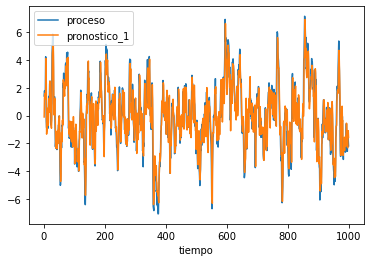

In [69]:
proceso[['proceso','pronostico_1']].plot()
plt.show()

MODELO ESCOGIDO ARMA(4,4)